## Loading the data

In [169]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from patsy import dmatrices
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [170]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df = pd.concat([train, test], ignore_index=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Data Cleaning

In [191]:
 df.isnull().sum() 

Survived      0
Age           0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [192]:
df.describe()

,Survived,Age
count,891.000000,891.000000
mean,0.383838,29.735277
std,0.486592,13.002218
min,0.000000,0.420000
25%,0.000000,22.000000
50%,0.000000,29.881138
75%,1.000000,35.000000
max,1.000000,80.000000


## Fixing missing values

In [171]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [160]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S


## Data Analysis

In [161]:
df.groupby('Pclass').Survived.sum()

Pclass
1    136.0
2     87.0
3    119.0
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

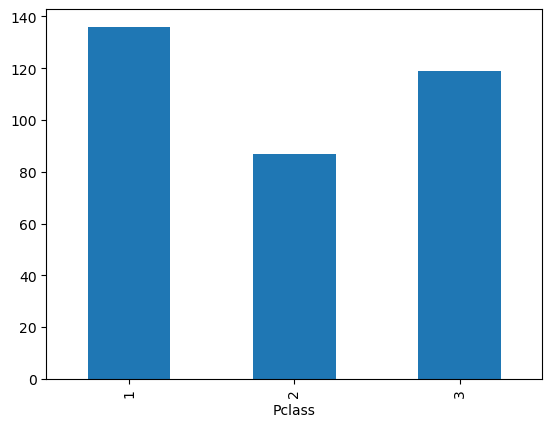

In [162]:
df.groupby('Pclass').Survived.sum().plot(kind='bar')

In [163]:
df.groupby(['Pclass','Sex']).Survived.sum()

Pclass  Sex   
1       female    91.0
        male      45.0
2       female    70.0
        male      17.0
3       female    72.0
        male      47.0
Name: Survived, dtype: float64

<Axes: ylabel='Pclass,Sex'>

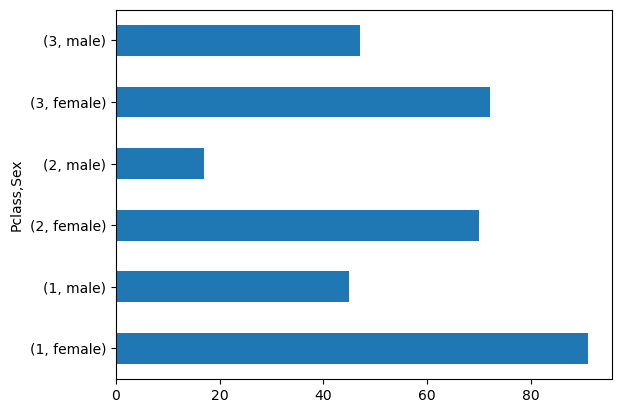

In [164]:
df.groupby(['Pclass','Sex']).Survived.sum().plot(kind='barh')

In [166]:
survived_count= pd.crosstab([df.Pclass, df.Sex],df.Survived)
survived_count

Survived       0.0  1.0
Pclass Sex             
1      female    3   91
       male     77   45
2      female    6   70
       male     91   17
3      female   72   72
       male    300   47

<Axes: xlabel='Pclass,Sex'>

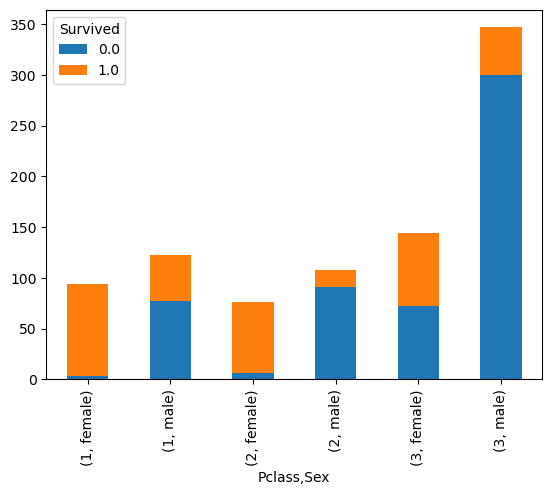

In [167]:
survived_count.plot(kind='bar', stacked=True)

## Training model

In [173]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.0,False,True,False,False,True
1,1.0,38.0,True,False,True,False,False
2,1.0,26.0,True,False,False,False,True
3,1.0,35.0,True,False,True,False,False
4,0.0,35.0,False,True,False,False,True


In [174]:

x = df.drop('Survived',axis=1)
y = df['Survived']
from sklearn.model_selection import train_test_split

 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [175]:

model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [176]:
 
model.score(x, y)

0.8013468013468014

In [178]:
#the model coefficients and the importance of each factor in predicting escape
pd.DataFrame(list(zip(x.columns, np.transpose(model.coef_))))

,0,1
0,Age,[-0.03239106821662101]
1,Sex_female,[1.277393047770042]
2,Sex_male,[-1.276639929360198]
3,Pclass_1,[1.1085166634469483]
4,Pclass_2,[0.03325480504554976]
5,Pclass_3,[-1.1410183500823554]


## Cross-validation: evaluating estimator performance

In [179]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

0.7878727010231623

In [182]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[97, 13],
       [22, 47]])

In [ ]:
Hyperparameter tuning : Grid Search, Random Search,Bayesian Optimization